In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.tree import export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("/kaggle/input/konsumsi-gula/consume.csv")  
data.head()

,User_ID,Gender,Age,Height_cm,Weight_kg,Total_Sugar_g,Unnamed: 6,Unnamed: 7
0,U001,Male,25,175,70,37.5,NaN,NaN
1,U002,Female,30,160,55,30.0,NaN,NaN
2,U003,Male,28,180,80,40.0,NaN,NaN
3,U004,Female,22,165,50,30.0,NaN,NaN
4,U005,Male,35,170,75,15.0,NaN,NaN


In [4]:
data = data.loc[:, ~data.columns.str.contains('^Unnamed')]
data.head()

,User_ID,Gender,Age,Height_cm,Weight_kg,Total_Sugar_g
0,U001,Male,25,175,70,37.5
1,U002,Female,30,160,55,30.0
2,U003,Male,28,180,80,40.0
3,U004,Female,22,165,50,30.0
4,U005,Male,35,170,75,15.0


In [5]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [11]:
data['Total_Sugar_g'] = pd.to_numeric(data['Total_Sugar_g'], errors='coerce')

data = data.dropna(subset=['Total_Sugar_g'])

bins = [0, 30, 35, float('inf')]  
labels = ["hijau", "kuning", "merah"]  

data["consume_category"] = pd.cut(data['Total_Sugar_g'], bins=bins, labels=labels)

print("\nDataset dengan Label Kategori:")
print(data)



Dataset dengan Label Kategori:
     User_ID  Gender  Age  Height_cm  Weight_kg  Total_Sugar_g  \
0       U001    Male   25        175         70           37.5   
1       U002  Female   30        160         55           30.0   
2       U003    Male   28        180         80           40.0   
3       U004  Female   22        165         50           30.0   
4       U005    Male   35        170         75           15.0   
...      ...     ...  ...        ...        ...            ...   
780     U781  Female   28        178         72           23.0   
852     U853    Male   33        165         95           44.0   
984     U985  Female   35        156         88           37.0   
993     U994    Male   26        154         94           42.0   
1027   U1028  Female   29        167         76           39.0   

     consume_category                                            advice  
0               merah        Konsumsi produk normal, tetap pertahankan.  
1               hijau      

In [12]:
X = data[['Total_Sugar_g']]  
y = data["consume_category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# melatih model
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)

# Mengevaluasi model
y_pred = tree_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, predictions)

print("Akurasi model: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:")
print(conf_matrix)

Akurasi model: 100.00%
Confusion Matrix:
[[20  0  0]
 [ 0  2  0]
 [ 0  0 13]]


In [13]:
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1)) 

Classification Report:
              precision    recall  f1-score   support

       hijau       1.00      1.00      1.00        20
      kuning       1.00      1.00      1.00         2
       merah       1.00      1.00      1.00        13

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35



In [17]:
data["consume_category"] = data["consume_category"].astype("category")

data.loc[:, "advice"] = data["consume_category"].map({
    "hijau": "Konsumsi gula harian di bawah normal.",
    "kuning": "Konsumsi gula harian normal.",
    "merah": "Konsumsi gula harian berlebihan.",
})

# Menampilkan Decision Tree dalam Format Teks
tree_rules = export_text(tree_model, feature_names=["advice"])
print(tree_rules)

# Menampilkan Dataframe dengan Analisis
print(data)

|--- advice <= 30.25
|   |--- class: hijau
|--- advice >  30.25
|   |--- advice <= 35.25
|   |   |--- class: kuning
|   |--- advice >  35.25
|   |   |--- class: merah

     User_ID  Gender  Age  Height_cm  Weight_kg  Total_Sugar_g  \
0       U001    Male   25        175         70           37.5   
1       U002  Female   30        160         55           30.0   
2       U003    Male   28        180         80           40.0   
3       U004  Female   22        165         50           30.0   
4       U005    Male   35        170         75           15.0   
...      ...     ...  ...        ...        ...            ...   
780     U781  Female   28        178         72           23.0   
852     U853    Male   33        165         95           44.0   
984     U985  Female   35        156         88           37.0   
993     U994    Male   26        154         94           42.0   
1027   U1028  Female   29        167         76           39.0   

     consume_category                  

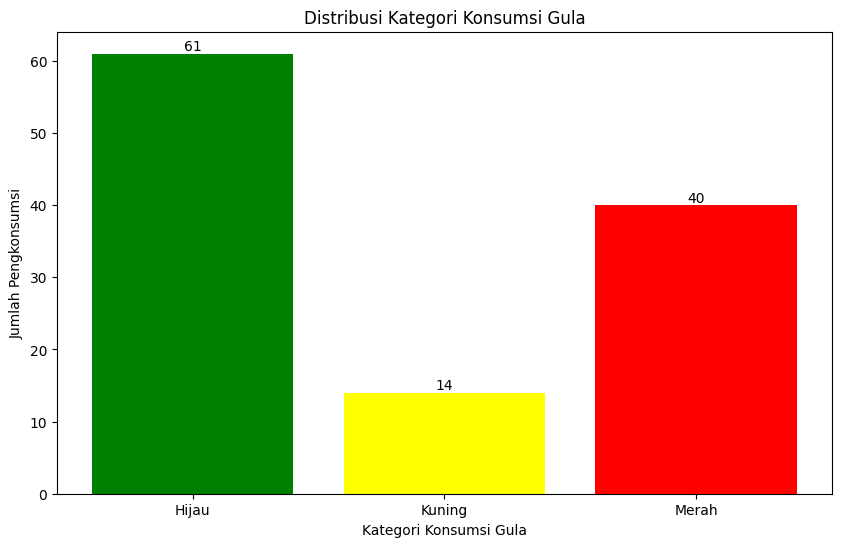

In [18]:
# Kategorisasi berdasarkan total gula
categories = ['Hijau', 'Kuning', 'Merah']  # Kategori berdasarkan kadar gula
counts = [
    (data["consume_category"] == "hijau").sum(),  # Hitung jumlah hijau
    (data["consume_category"] == "kuning").sum(),  # Hitung jumlah kuning
    (data["consume_category"] == "merah").sum()    # Hitung jumlah merah
]

# Membuat bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['green', 'yellow', 'red'])
plt.xlabel('Kategori Konsumsi Gula')
plt.ylabel('Jumlah Pengkonsumsi')
plt.title('Distribusi Kategori Konsumsi Gula')

# Menambahkan nilai pada setiap bar
for i in range(len(counts)):
    plt.text(i, counts[i], str(counts[i]), ha='center', va='bottom')

plt.show()

In [30]:
def predict_sugar_category(daily_sugar_intake):
    if not isinstance(daily_sugar_intake, (int, float)):
        return "Input konsumsi gula harian tidak valid. Harap masukkan angka."

    input_data = pd.DataFrame([[daily_sugar_intake]], columns=["Total_Sugar_g"])
    prediction = tree_model.predict(input_data)
    
    return prediction[0]

daily_sugar_intake_user = 35 
predicted_category = predict_sugar_category(daily_sugar_intake_user)

print(f"Konsumsi gula harian pengguna : {daily_sugar_intake_user}g \nKategori: {predicted_category}")

Konsumsi gula harian pengguna : 35g 
Kategori: kuning
